<a href="https://www.kaggle.com/code/rajatraj0502/salary-dataset-based-on-country-and-race?scriptVersionId=138148194" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-based-on-country-and-race/Salary_Data_Based_country_and_race.csv


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/salary-dataset-based-on-country-and-race/Salary_Data_Based_country_and_race.csv")

# Display the first 5 rows of the dataset
df.head()


,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Get dataset summary
summary = df.describe(include='all')

missing_values, summary


(Unnamed: 0             0
 Age                    2
 Gender                 2
 Education Level        3
 Job Title              2
 Years of Experience    3
 Salary                 5
 Country                0
 Race                   0
 dtype: int64,
          Unnamed: 0          Age Gender    Education Level          Job Title  \
 count   6704.000000  6702.000000   6702               6701               6702   
 unique          NaN          NaN      3                  7                193   
 top             NaN          NaN   Male  Bachelor's Degree  Software Engineer   
 freq            NaN          NaN   3674               2267                518   
 mean    3351.500000    33.620859    NaN                NaN                NaN   
 std     1935.422435     7.614633    NaN                NaN                NaN   
 min        0.000000    21.000000    NaN                NaN                NaN   
 25%     1675.750000    28.000000    NaN                NaN                NaN   
 50%     3351

In [4]:
# Fill missing values

# For categorical columns, fill missing values with the mode
for column in ['Gender', 'Education Level', 'Job Title']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# For numerical columns, fill missing values with the mean
for column in ['Age', 'Years of Experience', 'Salary']:
    df[column].fillna(df[column].mean(), inplace=True)

# Verify if all missing values have been filled
df.isnull().sum()


Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


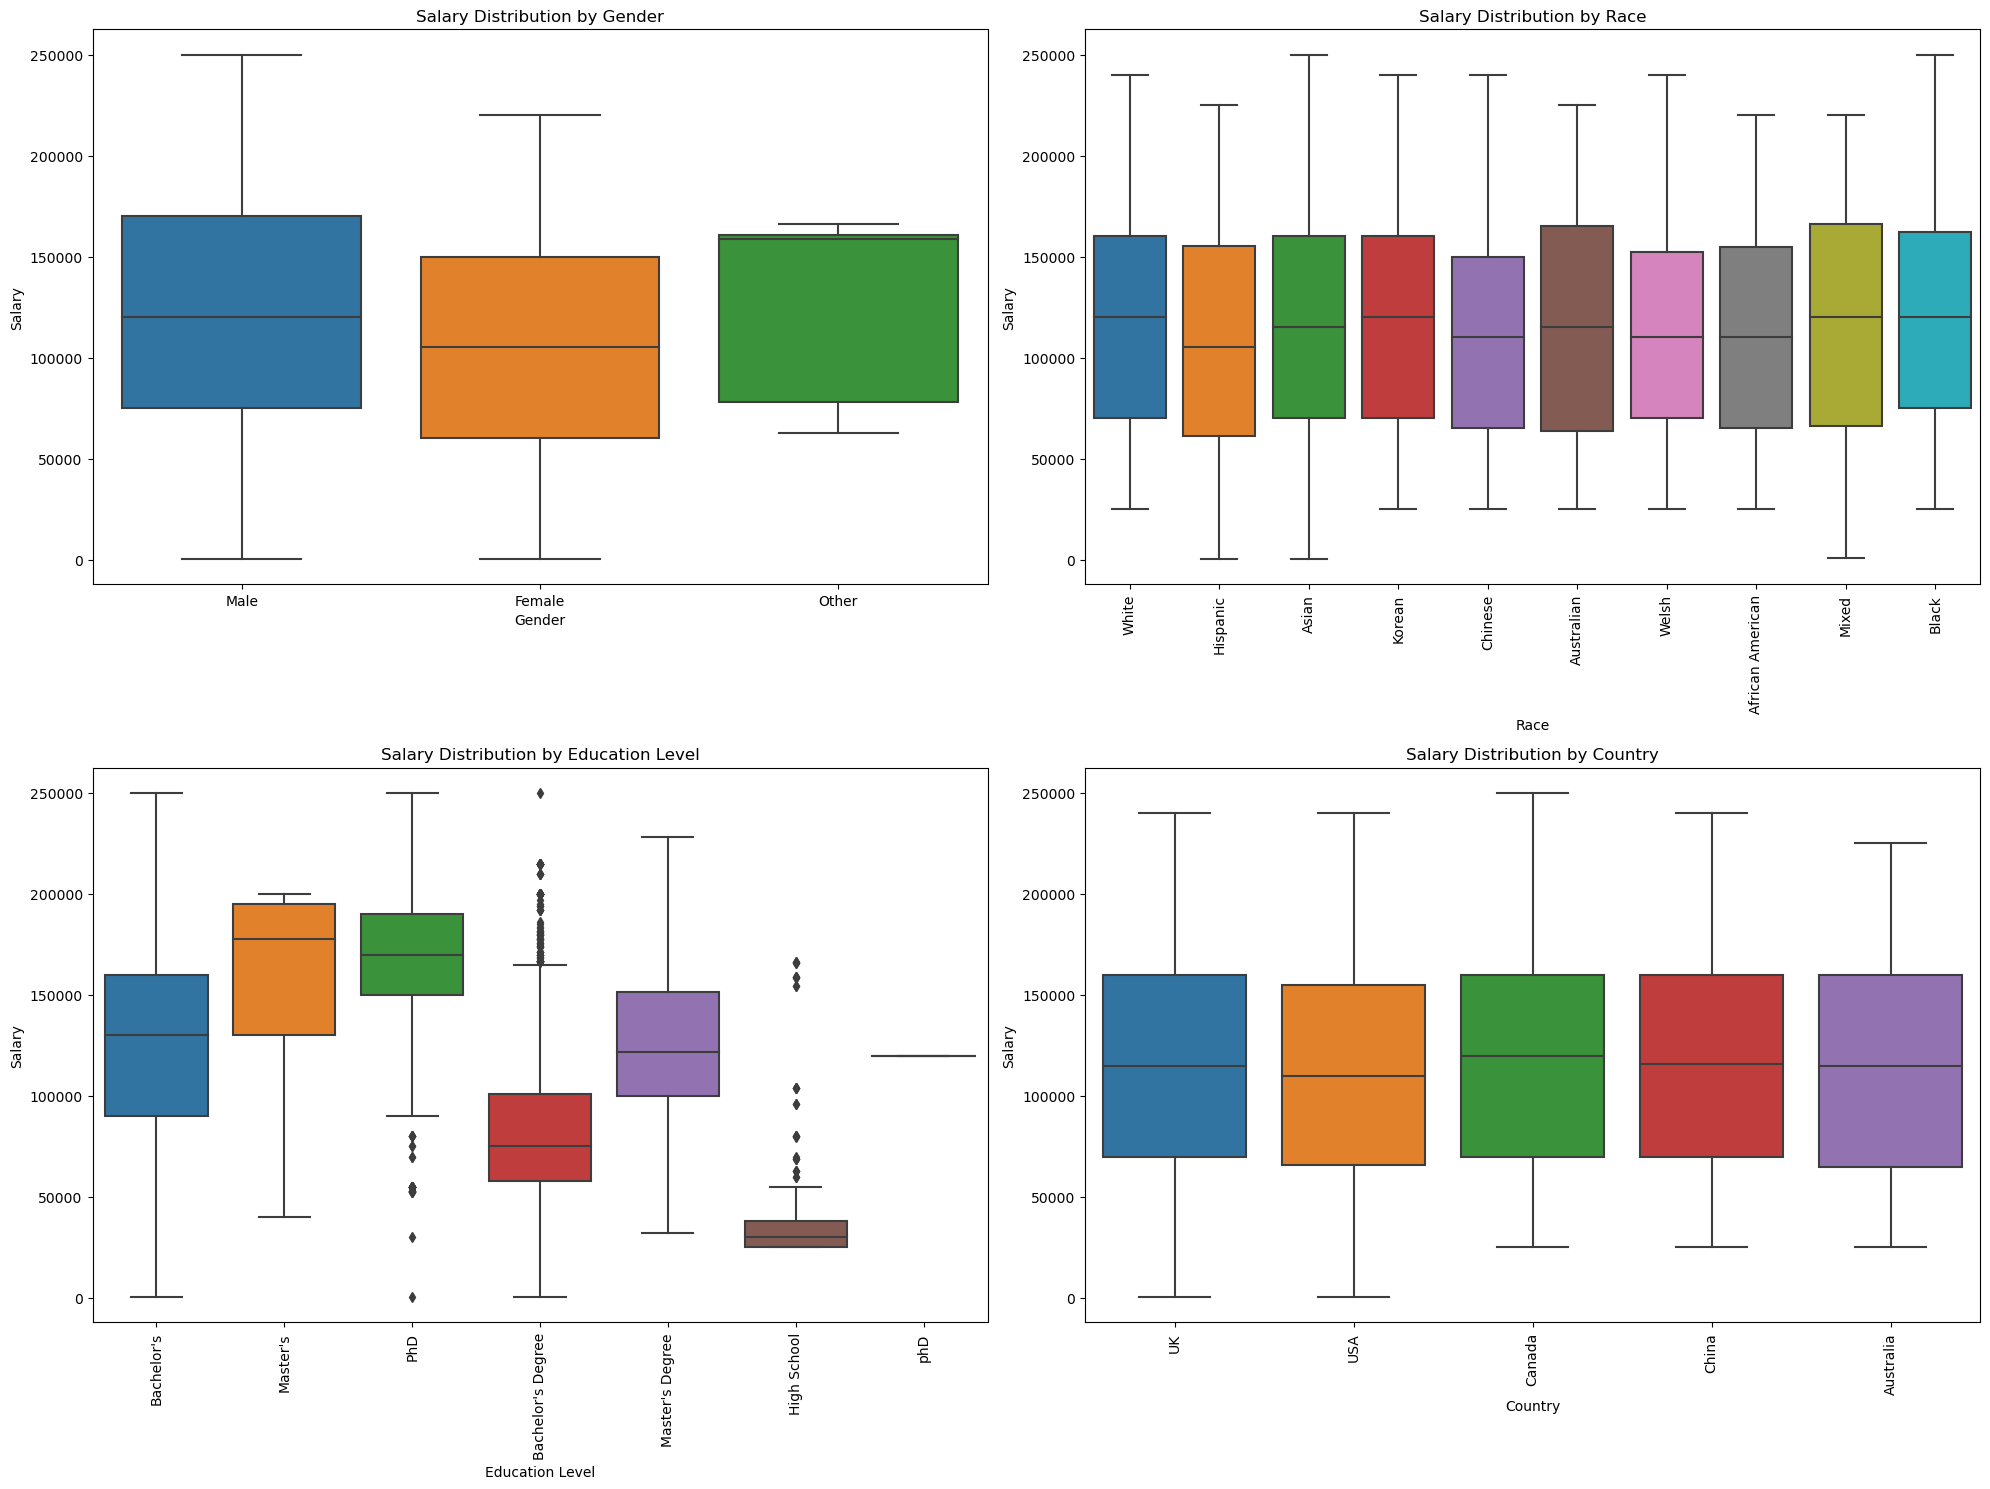

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(20, 15))

# Salary distribution with respect to Gender
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Gender', y='Salary')
plt.title('Salary Distribution by Gender')

# Salary distribution with respect to Race
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Race', y='Salary')
plt.xticks(rotation=90)
plt.title('Salary Distribution by Race')

# Salary distribution with respect to Education Level
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Education Level', y='Salary')
plt.xticks(rotation=90)
plt.title('Salary Distribution by Education Level')

# Salary distribution with respect to Country
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Country', y='Salary')
plt.xticks(rotation=90)
plt.title('Salary Distribution by Country')

plt.tight_layout()
plt.show()


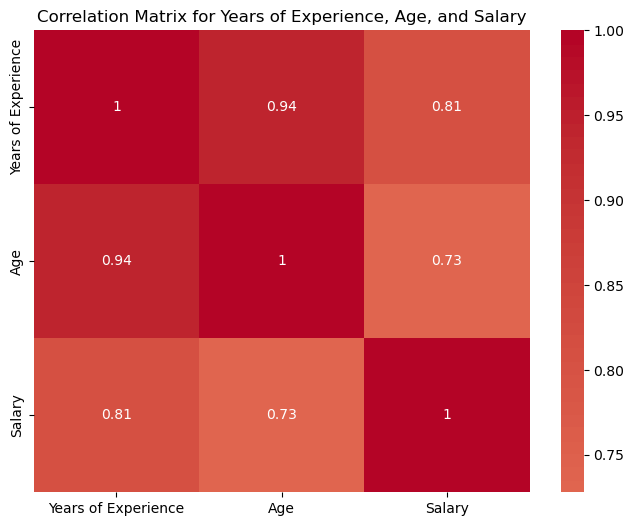

In [6]:
# Correlation matrix for 'Years of Experience', 'Age', and 'Salary'
correlation_matrix = df[['Years of Experience', 'Age', 'Salary']].corr()

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Years of Experience, Age, and Salary')
plt.show()


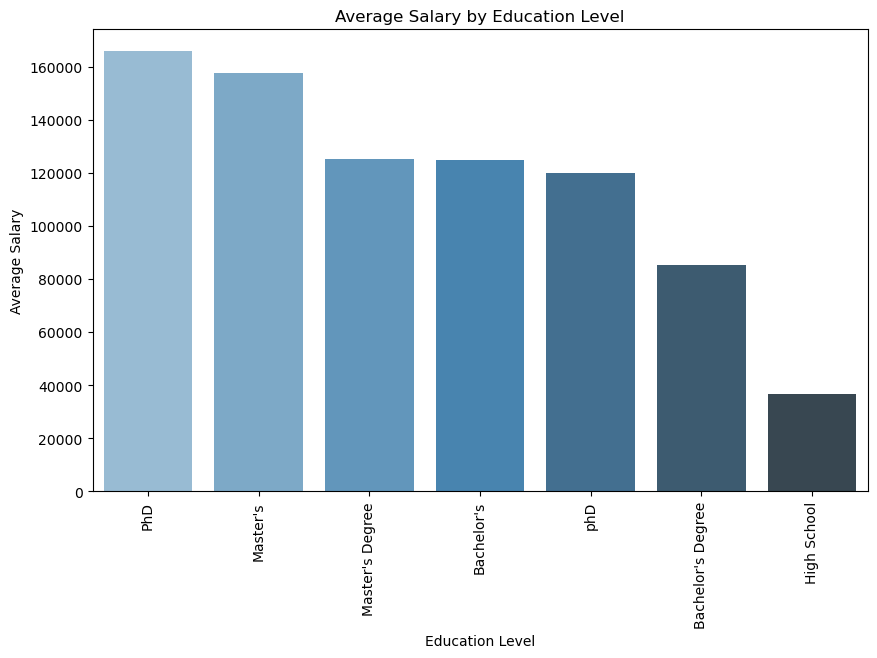

In [7]:
# Calculate average salary for each education level
average_salary_by_education = df.groupby('Education Level')['Salary'].mean().sort_values(ascending=False)

# Plot the average salary for each education level
plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary_by_education.index, y=average_salary_by_education.values, palette="Blues_d")
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()


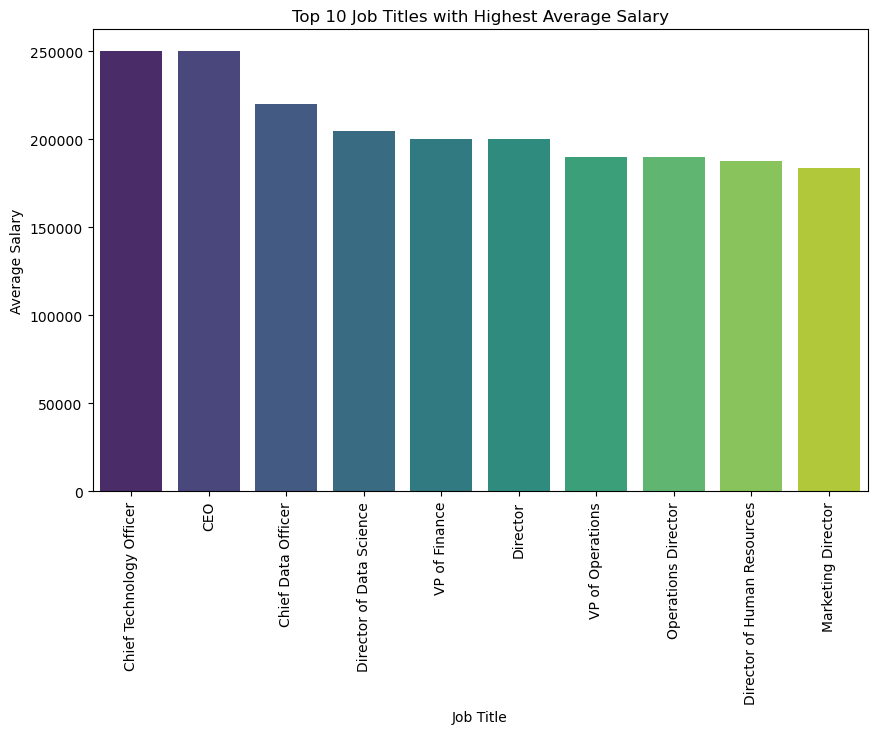

In [8]:
# Calculate average salary for each job title
average_salary_by_job = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False)

# Select top 10 job titles with highest average salary
top_10_jobs = average_salary_by_job[:10]

# Plot the average salary for top 10 job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_jobs.index, y=top_10_jobs.values, palette="viridis")
plt.title('Top 10 Job Titles with Highest Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()


In [9]:
# Check unique values in 'Education Level'
df['Education Level'].unique()


array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [10]:
# Clean 'Education Level' column
df['Education Level'] = df['Education Level'].str.lower()
df['Education Level'] = df['Education Level'].replace({"bachelor's degree": "bachelor's", "master's degree": "master's"})

# Check cleaned 'Education Level' values
df['Education Level'].unique()


array(["bachelor's", "master's", 'phd', 'high school'], dtype=object)

In [11]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
# Update ordinal mapping for 'Education Level'
education_level_order = ['high school', 'bachelor\'s', 'master\'s', 'phd']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Years of Experience', 'Age']),
        ('cat', OneHotEncoder(drop='first'), ['Gender', 'Country', 'Race', 'Job Title']),
        ('ord', OrdinalEncoder(categories=[education_level_order]), ['Education Level'])
    ])

# Apply preprocessing to the dataset
df_preprocessed = preprocessor.fit_transform(df)

# The output is a numpy array, convert it back to dataframe
df_preprocessed = pd.DataFrame(df_preprocessed)

# Display the first few rows of the preprocessed dataframe
df_preprocessed.head()


,0
0,"(0, 0)\t5.0\n (0, 1)\t32.0\n (0, 2)\t1.0\n..."
1,"(0, 0)\t3.0\n (0, 1)\t28.0\n (0, 7)\t1.0\n..."
2,"(0, 0)\t15.0\n (0, 1)\t45.0\n (0, 2)\t1.0\..."
3,"(0, 0)\t7.0\n (0, 1)\t36.0\n (0, 7)\t1.0\n..."
4,"(0, 0)\t20.0\n (0, 1)\t52.0\n (0, 2)\t1.0\..."


In [13]:
# Define preprocessor without one-hot encoding 'Job Title'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Years of Experience', 'Age', 'Salary']),
        ('cat', OneHotEncoder(drop='first'), ['Gender', 'Country', 'Race']),
        ('ord', OrdinalEncoder(categories=[education_level_order]), ['Education Level'])
    ], remainder='drop', sparse_threshold=0)

# Apply preprocessing to the dataset
df_preprocessed = preprocessor.fit_transform(df)

# Get feature names after one-hot encoding (excluding 'Job Title')
one_hot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=['Gender', 'Country', 'Race'])

# Get all feature names
feature_names = np.concatenate([one_hot_feature_names, ['Years of Experience', 'Age', 'Education Level', 'Salary']])

# Convert the numpy array to dataframe
df_preprocessed = pd.DataFrame(df_preprocessed, columns=feature_names)

# Append 'Job Title' column to the preprocessed dataframe
df_preprocessed['Job Title'] = df['Job Title']

# Display the first few rows of the preprocessed dataframe
df_preprocessed.head()


,Gender_Male,Gender_Other,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Years of Experience,Age,Education Level,Salary,Job Title
0,5.0,32.0,90000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Software Engineer
1,3.0,28.0,65000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,Data Analyst
2,15.0,45.0,150000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Senior Manager
3,7.0,36.0,60000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sales Associate
4,20.0,52.0,200000.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Director


In [14]:
# Define preprocessor with correct order of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Gender', 'Country', 'Race']),
        ('ord', OrdinalEncoder(categories=[education_level_order]), ['Education Level']),
        ('num', 'passthrough', ['Years of Experience', 'Age', 'Salary'])
    ], remainder='drop', sparse_threshold=0)

# Apply preprocessing to the dataset
df_preprocessed = preprocessor.fit_transform(df)

# Get feature names after one-hot encoding (excluding 'Job Title')
one_hot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=['Gender', 'Country', 'Race'])

# Get all feature names
feature_names = np.concatenate([one_hot_feature_names, ['Education Level', 'Years of Experience', 'Age', 'Salary']])

# Convert the numpy array to dataframe
df_preprocessed = pd.DataFrame(df_preprocessed, columns=feature_names)

# Append 'Job Title' column to the preprocessed dataframe
df_preprocessed['Job Title'] = df['Job Title']

# Display the first few rows of the preprocessed dataframe
df_preprocessed.head()


,Gender_Male,Gender_Other,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Education Level,Years of Experience,Age,Salary,Job Title
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,32.0,90000.0,Software Engineer
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,28.0,65000.0,Data Analyst
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,15.0,45.0,150000.0,Senior Manager
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,36.0,60000.0,Sales Associate
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,20.0,52.0,200000.0,Director


In [15]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale
columns_to_scale = ['Years of Experience', 'Age', 'Salary']

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler and transform the relevant columns
df_preprocessed[columns_to_scale] = scaler.fit_transform(df_preprocessed[columns_to_scale])

# Show the first few rows of the preprocessed dataframe
df_preprocessed.head()



,Gender_Male,Gender_Other,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Education Level,Years of Experience,Age,Salary,Job Title
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.510911,-0.212909,-0.480018,Software Engineer
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,-0.841097,-0.738331,-0.953839,Data Analyst
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.140018,1.494713,0.657152,Senior Manager
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.180725,0.312513,-1.048603,Sales Associate
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.965483,2.414201,1.604794,Director


In [16]:
from sklearn.model_selection import train_test_split

# Define the feature matrix X and the target variable y
X = df_preprocessed.drop(['Salary', 'Job Title'], axis=1)
y = df_preprocessed['Salary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5363, 18), (1341, 18), (5363,), (1341,))

In [17]:
from sklearn.linear_model import LinearRegression

# Initialize a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R^2 score)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.28173822783005253, 0.7063202414544538)

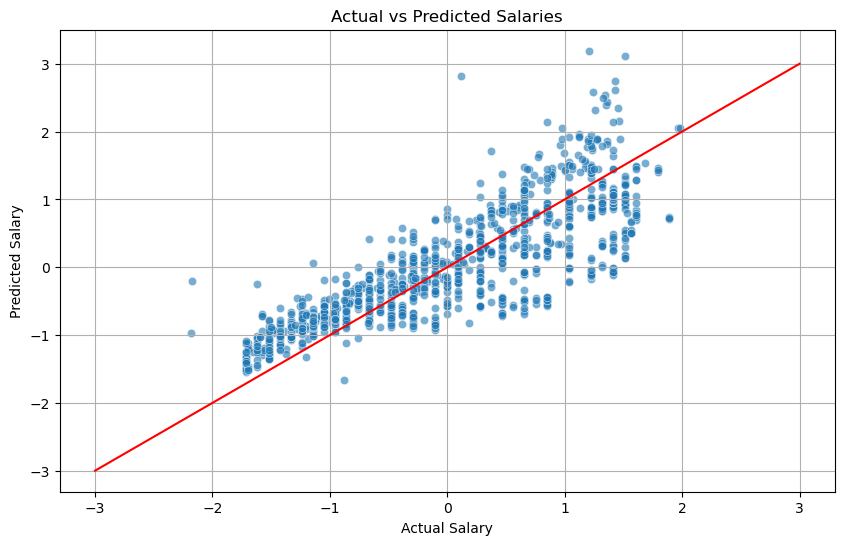

In [19]:
# Scatter plot of actual vs predicted salaries
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([-3, 3], [-3, 3], color='red')  # diagonal line for reference
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salaries')
plt.grid(True)
plt.show()


In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Use the model to make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate the mean squared error
rf_mse = mean_squared_error(y_test, rf_y_pred)

# Calculate the coefficient of determination (R^2 score)
rf_r2 = r2_score(y_test, rf_y_pred)

rf_mse, rf_r2


(0.10246254409323617, 0.8931945606351465)

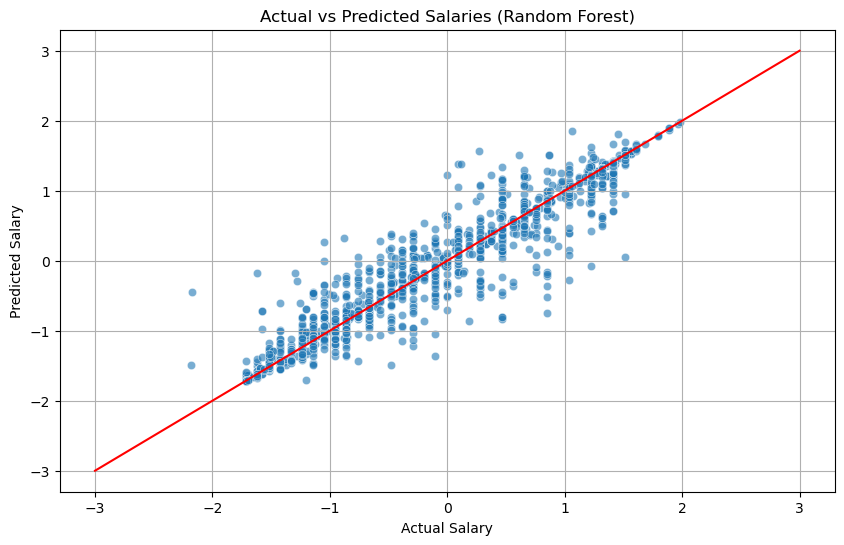

In [21]:
# Scatter plot of actual vs predicted salaries for the random forest model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_y_pred, alpha=0.6)
plt.plot([-3, 3], [-3, 3], color='red')  # diagonal line for reference
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salaries (Random Forest)')
plt.grid(True)
plt.show()


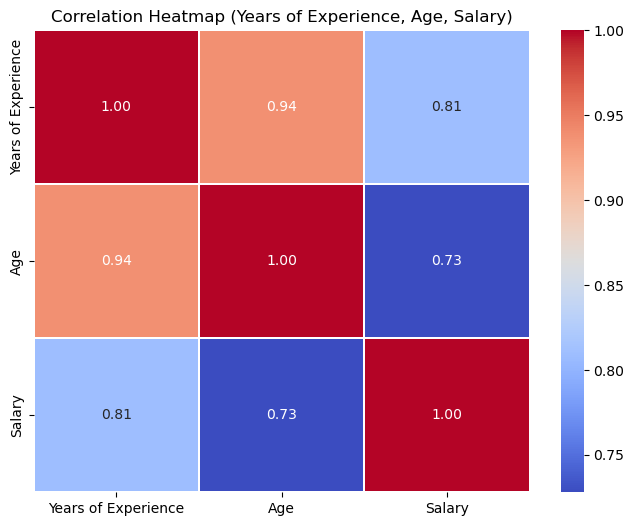

In [22]:
# Calculate the correlation matrix
correlation_matrix = df[['Years of Experience', 'Age', 'Salary']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('Correlation Heatmap (Years of Experience, Age, Salary)')
plt.show()


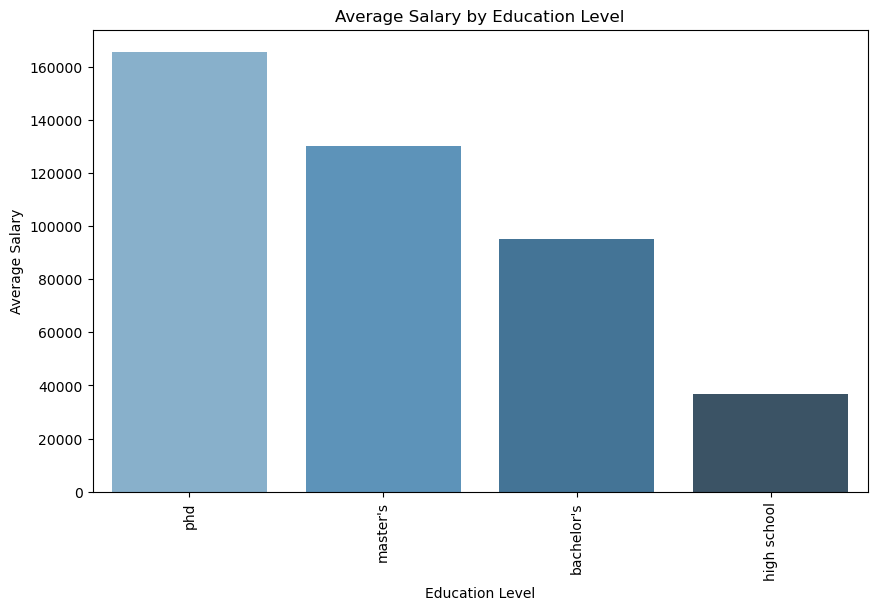

In [23]:
# Calculate average salary for each education level
average_salary_by_education = df.groupby('Education Level')['Salary'].mean().sort_values(ascending=False)

# Plot the average salary for each education level
plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary_by_education.index, y=average_salary_by_education.values, palette="Blues_d")
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()
